In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Hierarchical clustering of the grain data
- In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [2]:
seeds = pd.read_csv('seeds.csv', header=None).drop(7, axis=1)
rows = [i for i in range(1, 209, 5)]
samples = seeds.loc[rows].values
varieties = ['Kama wheat']*14 + ['Rosa wheat']*14 + ['Canadian wheat']*14

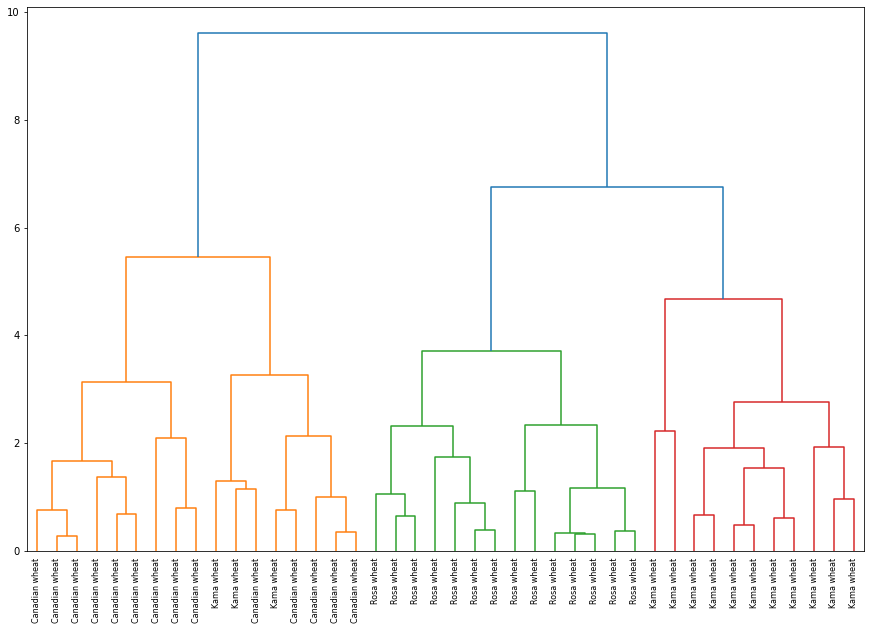

In [3]:
plt.figure(figsize=(15, 10))

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()

Superb! Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

### Hierarchies of stocks
- In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

- linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

In [4]:
stocks = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
movements = stocks.values
companies = stocks.index.values

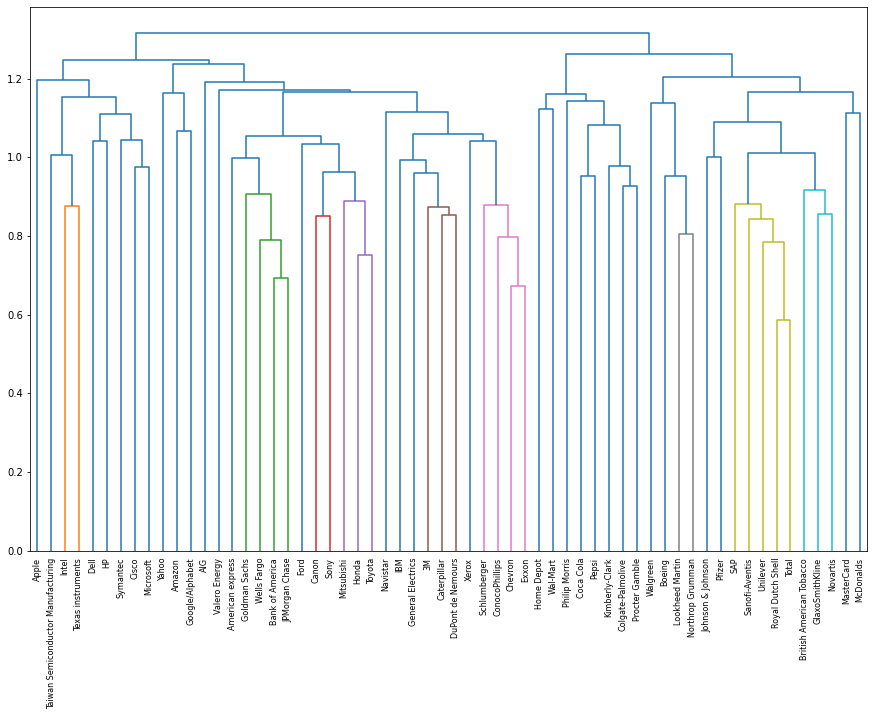

In [5]:
plt.figure(figsize=(15, 10))

# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=8)
plt.show()

### Different linkage, different hierarchical clustering!
- In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

- You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

In [6]:
eurovision = pd.read_csv('eurovision-2016.csv')
samples = eurovision.pivot_table(index='From country', columns=['To country'], values='Televote Points').fillna(0).values
country_names = eurovision['From country'].unique()

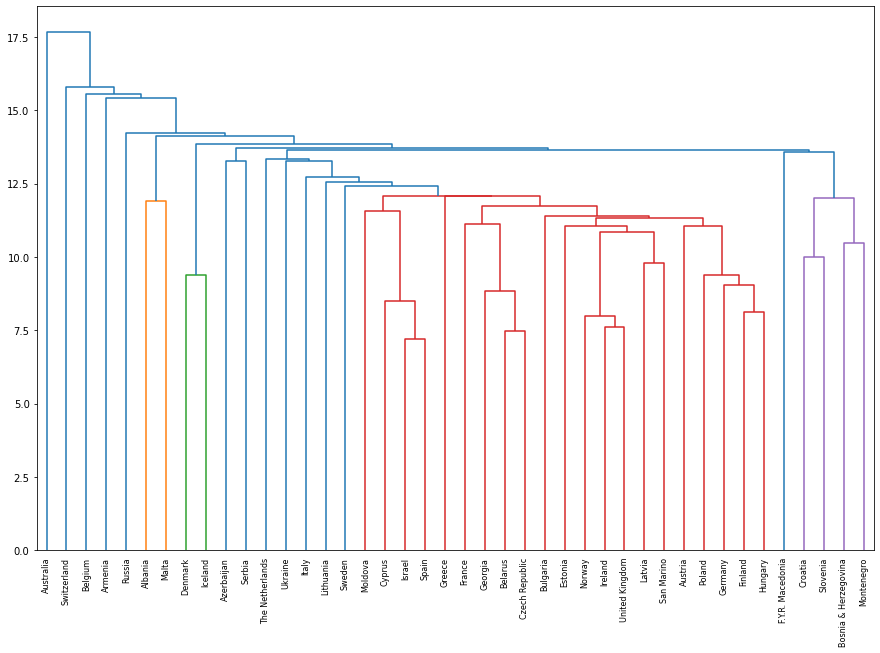

In [7]:
plt.figure(figsize=(15, 10))

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=country_names, leaf_rotation=90, leaf_font_size=8)
plt.show()

Great work! As you can see, performing single linkage hierarchical clustering produces a different dendrogram!

### Extracting the cluster labels
- In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

- The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

In [8]:
seeds = pd.read_csv('seeds.csv', header=None).drop(7, axis=1)
rows = [i for i in range(1, 209, 5)]
samples = seeds.loc[rows].values
varieties = ['Kama wheat']*14 + ['Rosa wheat']*14 + ['Canadian wheat']*14

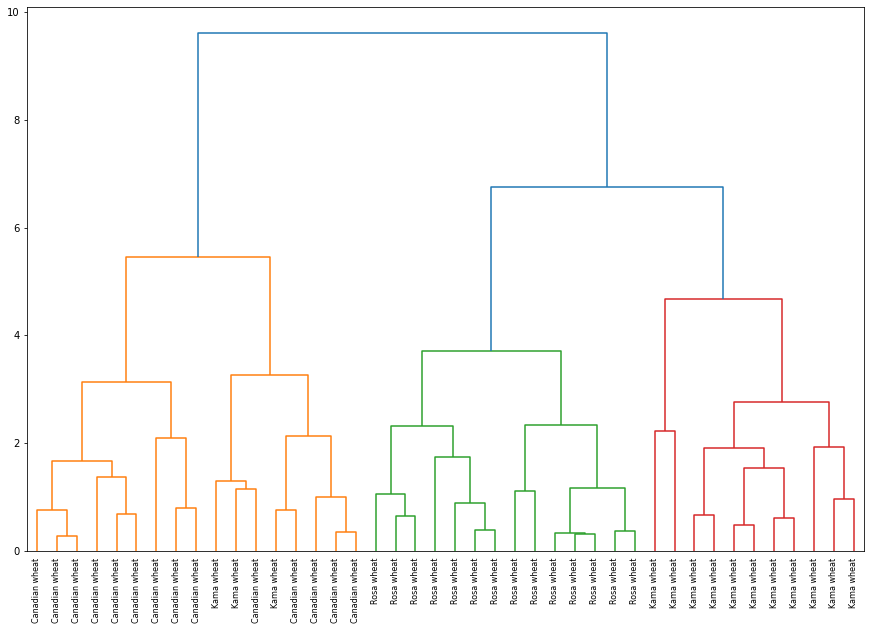

In [9]:
plt.figure(figsize=(15, 10))

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=8,
)
plt.show()

In [10]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


Fantastic - you've now mastered the fundamentals of k-Means and agglomerative hierarchical clustering. Next, you'll learn about t-SNE, which is a powerful tool for visualizing high dimensional data.

### t-SNE for 2-dimensional maps
- t-SNE = 't-distributed stochastic neighbor embedding'
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

### t-SNE on the iris dataset
- Iris dataset has 4 measurements, so samples are 4-dimensional
- t-SNE maps samples to 2D space
- t-SNE didn't know that there were different species
- ... yet kept the species mostly separate

### Interpreting t-SNE scatter plots
- 'versicolor' and 'virginica' harder to distinguish from one another
- Consistent with k-means inertia plot: could argue for 2 clusters, or for 3

### t-SNE in sklearn

In [11]:
from sklearn import datasets
samples = datasets.load_iris()['data']
species = datasets.load_iris()['target']

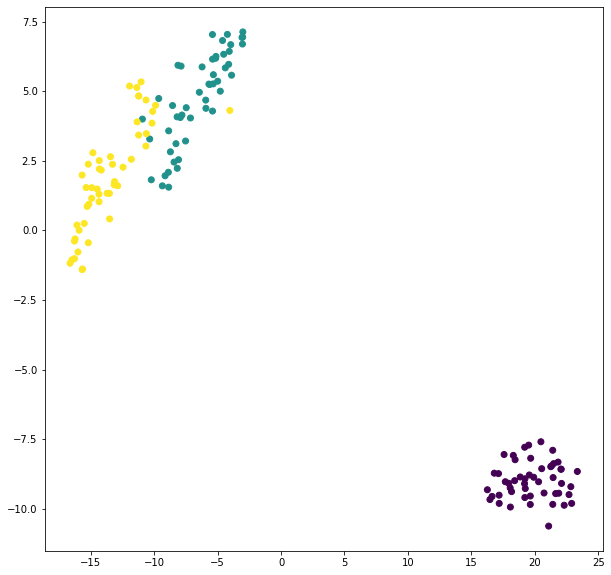

In [12]:
plt.figure(figsize=(10, 10))

from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c=species)
plt.show()

### t-SNE has only fit_transform()
- Has a fit_transform() method
- Simultaneously fit the model and transforms the data
- Has no spearate fit() or transform() methods
 - Can't extend the map to include new data samples 
 - Must start over each time!

### t-SNE learning rate
- Choose learning rate for the dataset
- Wrong choice: points bunch together
- Try values between 50 and 200

### Different every time
- t-SNE features are different every time
- Piedmont wines, 3 runs, 3 different scatter plots!
- ... however: The wine varieties(=colors) have same position relative to one another

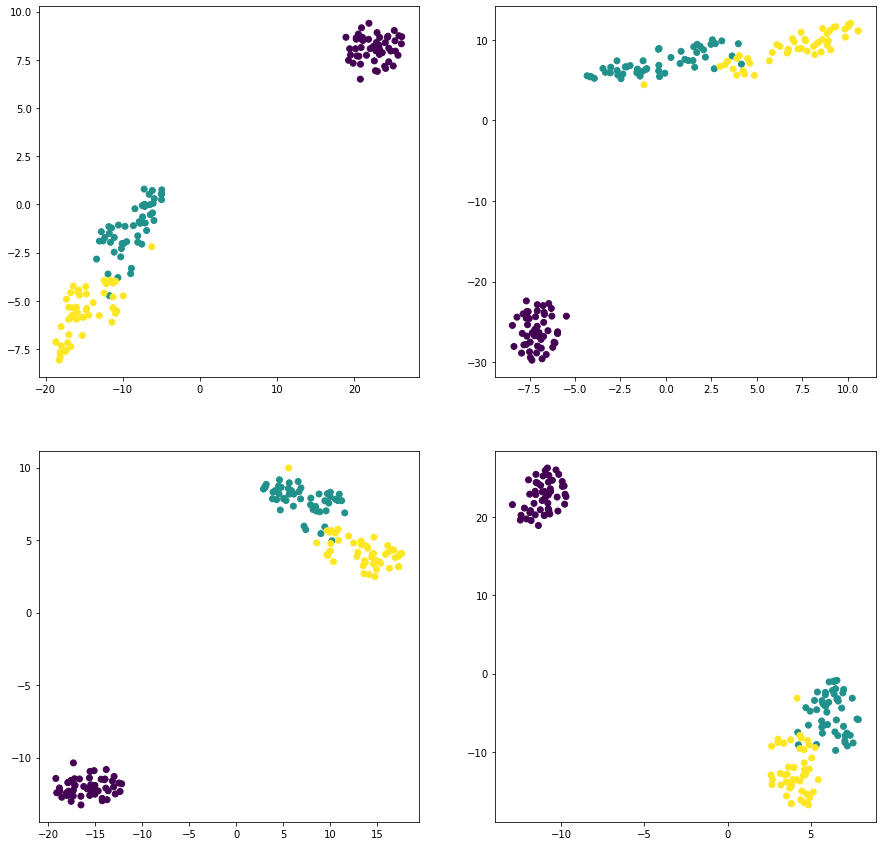

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i in [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]:
    from sklearn.manifold import TSNE
    model = TSNE(learning_rate=100)
    transformed = model.fit_transform(samples)
    xs = transformed[:, 0]
    ys = transformed[:, 1]
    i.scatter(xs, ys, c=species)
    
plt.show()

### t-SNE visualization of grain dataset
- In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

In [14]:
samples = pd.read_csv('seeds.csv', header=None).drop(7, axis=1).values
variety_numbers = pd.read_csv('seeds.csv', header=None)[7].values

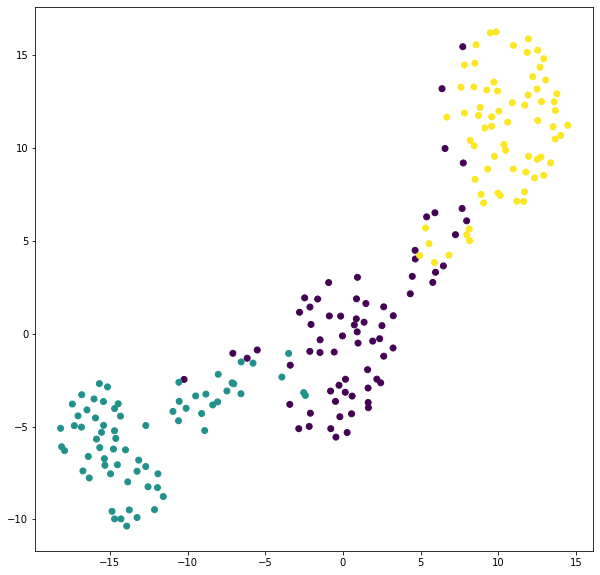

In [15]:
plt.figure(figsize=(10, 10))

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

Excellent! As you can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? You'll find out in the next exercise!

### A t-SNE map of the stock market
- t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

In [16]:
stocks = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col=0)
movements = stocks.values
companies = stocks.index.values

from sklearn.preprocessing import Normalizer
normalized_movements = Normalizer().fit_transform(movements)

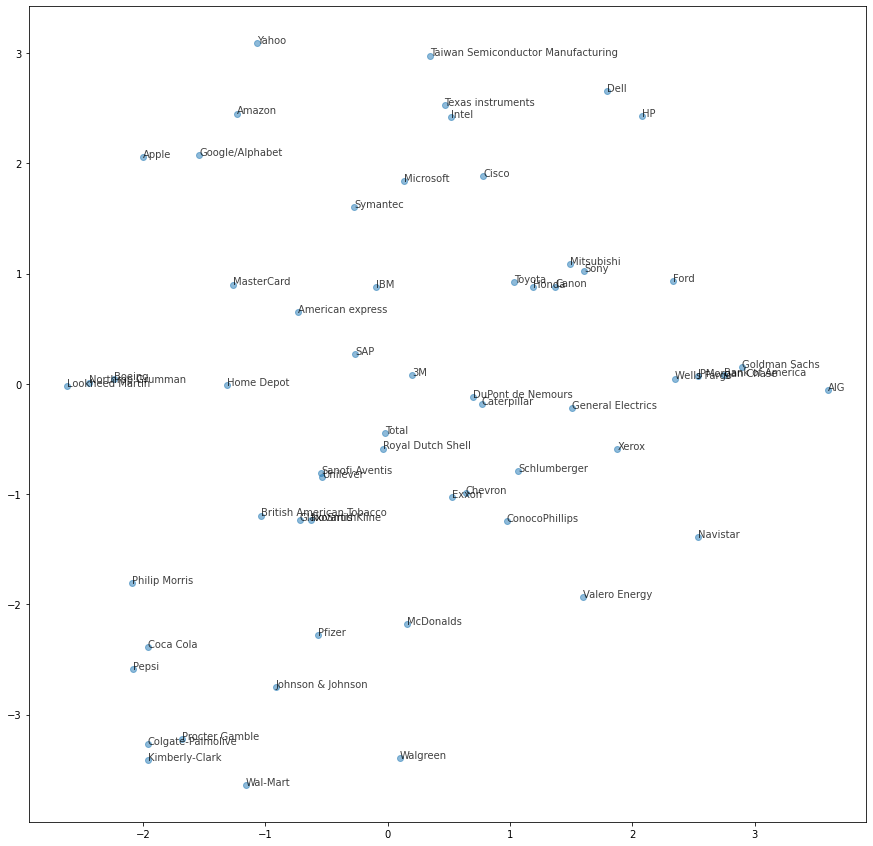

In [17]:
plt.figure(figsize=(15, 15))

# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:, 1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()

Fantastic! It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.